[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Tesla Data:
                       Date       Open       High        Low      Close  \
0 2020-01-02 00:00:00+00:00  28.684000  28.684000  28.713333  28.114000   
1 2020-01-03 00:00:00+00:00  29.534000  29.534000  30.266666  29.128000   
2 2020-01-06 00:00:00+00:00  30.102667  30.102667  30.104000  29.333332   
3 2020-01-07 00:00:00+00:00  31.270666  31.270666  31.441999  30.224001   
4 2020-01-08 00:00:00+00:00  32.809334  32.809334  33.232666  31.215334   

   Adj Close     Volume  
0  28.299999  142981500  
1  29.366667  266677500  
2  29.364668  151995000  
3  30.760000  268231500  
4  31.580000  467164500  
Tesla Revenue Data:
                                           2023-12-31     2022-12-31  \
Tax Effect Of Unusual Items                       0.0    -14080000.0   
Tax Rate For Calcs                               0.21           0.08   
Normalized EBITDA                       14796000000.0  17833000000.0   
Total Unusual Items                               0.0   -176000000.0   
T

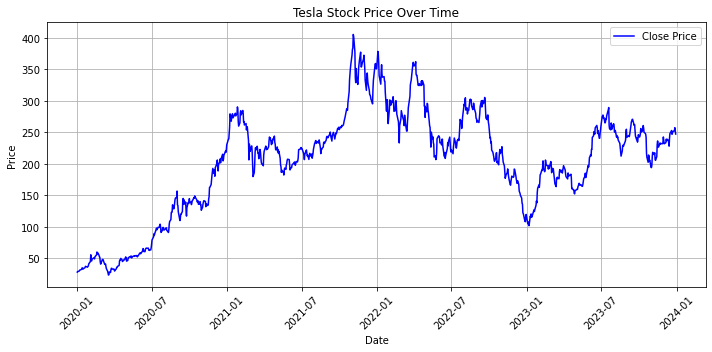

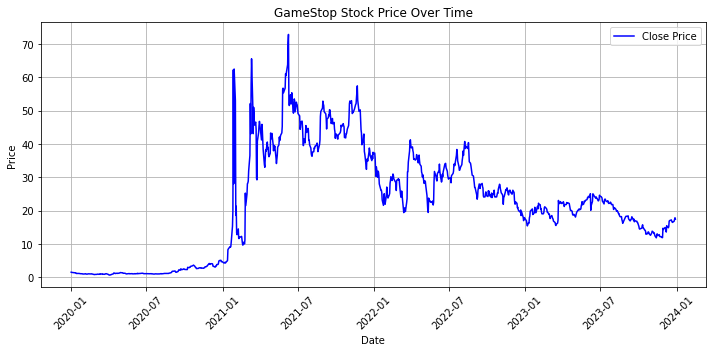

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to download stock data
def download_stock_data(ticker):
    data = yf.download(ticker, start='2020-01-01', end='2024-01-01')
    data.reset_index(inplace=True)  # Reset index to include 'Date' as a column
    # Flatten the columns and rename for clarity
    data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    return data

# Function to get revenue data from Yahoo Finance
def get_revenue_data(ticker):
    stock_info = yf.Ticker(ticker)
    financials = stock_info.financials
    return financials

# Function to create a plot
def make_graph(data, title):
    # Check for 'Date' and 'Close' columns
    if 'Date' in data.columns and 'Close' in data.columns:
        plt.figure(figsize=(10, 5))
        plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("Data does not contain 'Date' and 'Close' columns. Cannot plot.")
        print("Available columns:", data.columns)  # Print available columns for debugging

# Download Tesla stock data
tesla_data = download_stock_data('TSLA')
print("Tesla Data:")
print(tesla_data.head())  # Display first few rows for verification

# Check Tesla revenue data
tesla_revenue = get_revenue_data('TSLA')
print("Tesla Revenue Data:")
print(tesla_revenue.head())  # Display first few rows to check data structure

# Download GameStop stock data
gme_data = download_stock_data('GME')
print("GameStop Data:")
print(gme_data.head())  # Display first few rows for verification

# Check GameStop revenue data
gme_revenue = get_revenue_data('GME')
print("GameStop Revenue Data:")
print(gme_revenue.head())  # Display first few rows to check data structure

# Check if 'Close' column exists for plotting
if 'Close' in tesla_data.columns:
    # Plot Tesla stock data
    make_graph(tesla_data, 'Tesla Stock Price Over Time')
else:
    print("Tesla data does not have 'Close' column.")

if 'Close' in gme_data.columns:
    # Plot GameStop stock data
    make_graph(gme_data, 'GameStop Stock Price Over Time')
else:
    print("GameStop data does not have 'Close' column.")
